In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import re

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import KFold
import pydot
import nltk
import graphviz
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df_all = pd.read_csv("export_TweetSentBR.csv")
df_all.shape

(11570, 4)

In [4]:
df_all.head()

,id,id_twitter,text,sentiment
0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1


In [5]:
len(df_all[df_all["sentiment"] == "-"]['text'])

37

In [6]:
df_remove = df_all[df_all['sentiment'] == '-']
df_all = df_all.drop(df_remove.index)

In [7]:
df_all.isnull().sum()

id            0
id_twitter    0
text          0
sentiment     0
dtype: int64

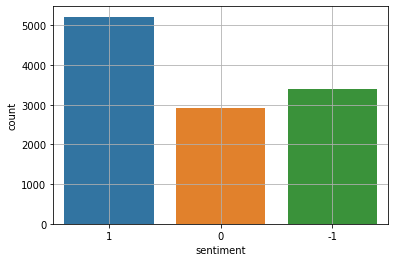

In [8]:
df_all = df_all.dropna()
sns.countplot(data=df_all, x='sentiment')
plt.grid()

In [9]:
df_all = df_all.reset_index()
df_all

,index,id,id_twitter,text,sentiment
0,0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1
...,...,...,...,...,...
11528,11565,12908,864636619000877056,eu ja to aqui pronto pro #MasterChefBR mas ain...,-1
11529,11566,12909,863581588713603072,MALUCO! Uma coisa que eu não tenho coragem é e...,-1
11530,11567,12910,864831041349054464,#MaisVoce @ANAMARIABRAGA está linda @RedeGlobo,1
11531,11568,12911,863042798575951872,"Que orgulho de ti, @sportrecife! #Encontro",1


In [10]:
df_all = df_all.drop(columns=['index'])
df_all['sentiment'].unique()

array(['1', '0', '-1'], dtype=object)

In [11]:
df_all['sentiment'] = df_all['sentiment'].apply(lambda x: int(x))

In [12]:
Tweet = df_all['text']
polarity = np.asarray(df_all['sentiment'])

np.unique(polarity)

array([-1,  0,  1], dtype=int64)

In [13]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(11533, 13064)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.66      0.49      0.56      1017
           0       0.79      0.12      0.21       908
           1       0.56      0.94      0.70      1535

    accuracy                           0.59      3460
   macro avg       0.67      0.52      0.49      3460
weighted avg       0.65      0.59      0.53      3460



In [15]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [16]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)

In [18]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train

<8073x15346 sparse matrix of type '<class 'numpy.float64'>'
	with 56302 stored elements in Compressed Sparse Row format>

In [19]:
X_test

<3460x15346 sparse matrix of type '<class 'numpy.float64'>'
	with 24071 stored elements in Compressed Sparse Row format>

In [20]:
one = OneHotEncoder(sparse=False)

In [21]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [61]:
fit = model.fit(X_train.todense(), y_one, epochs=25, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/25
253/253 [==============================] - 2s 7ms/step - loss: 1.0062 - accuracy: 0.4968 - val_loss: 0.8816 - val_accuracy: 0.5908
Epoch 2/25
253/253 [==============================] - 1s 6ms/step - loss: 0.7231 - accuracy: 0.6986 - val_loss: 0.8610 - val_accuracy: 0.6104
Epoch 3/25
253/253 [==============================] - 2s 6ms/step - loss: 0.4383 - accuracy: 0.8462 - val_loss: 0.9735 - val_accuracy: 0.6061
Epoch 4/25
253/253 [==============================] - 1s 6ms/step - loss: 0.2621 - accuracy: 0.9184 - val_loss: 1.1817 - val_accuracy: 0.6040
Epoch 5/25
253/253 [==============================] - 1s 6ms/step - loss: 0.1778 - accuracy: 0.9462 - val_loss: 1.3092 - val_accuracy: 0.5960
Epoch 6/25
253/253 [==============================] - 1s 6ms/step - loss: 0.1212 - accuracy: 0.9641 - val_loss: 1.4796 - val_accuracy: 0.5960
Epoch 7/25
253/253 [==============================] - 1s 6ms/step - loss: 0.0960 - accuracy: 0.9729 - val_loss: 1.5960 - val_accuracy: 0.5832
Epoch 

In [22]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(X_train_transform):
    cont += 1
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train.todense(), y_train_one, epochs=5, validation_data=(X_test.todense(), y_teste_one))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
325/325 [==============================] - 2s 6ms/step - loss: 0.9917 - accuracy: 0.5049 - val_loss: 0.8321 - val_accuracy: 0.6213
Epoch 2/5
325/325 [==============================] - 2s 6ms/step - loss: 0.7064 - accuracy: 0.7009 - val_loss: 0.8157 - val_accuracy: 0.6187
Epoch 3/5
325/325 [==============================] - 2s 6ms/step - loss: 0.4408 - accuracy: 0.8429 - val_loss: 0.9405 - val_accuracy: 0.6092
Epoch 4/5
325/325 [==============================] - 2s 5ms/step - loss: 0.2783 - accuracy: 0.9125 - val_loss: 1.1053 - val_accuracy: 0.6014
Epoch 5/5
325/325 [==============================] - 2s 5ms/step - loss: 0.1870 - accuracy: 0.9412 - val_loss: 1.2545 - val_accuracy: 0.5893
 
Iter:  2
 
Epoch 1/5
325/325 [==============================] - 2s 5ms/step - loss: 0.9803 - accuracy: 0.5199 - val_loss: 0.8220 - val_accuracy: 0.6334
Epoch 2/5
325/325 [==============================] - 2s 5ms/step - loss: 0.6769 - accuracy: 0.7332 - val_loss: 0.8382 - val_accura

In [23]:
def media_std(val_accuracy):
    matrix_acc = np.array(val_accuracy)
    
    for i in range(len(matrix_acc)):
        print(f' Fold: {i}\tMédia: {matrix_acc[i].mean()}\tStd: {matrix_acc[i].std()} ')
        
media_std(val_accuracy)

 Fold: 0	Média: 0.607972264289856	Std: 0.011736574987193948 
 Fold: 1	Média: 0.6100519895553589	Std: 0.019016809644120603 
 Fold: 2	Média: 0.6188908100128174	Std: 0.007680590607294125 
 Fold: 3	Média: 0.6202948689460754	Std: 0.011044411373002775 
 Fold: 4	Média: 0.5797051191329956	Std: 0.02200009559815324 
 Fold: 5	Média: 0.5885516047477722	Std: 0.02548512675249659 
 Fold: 6	Média: 0.6010407686233521	Std: 0.015151766646838325 
 Fold: 7	Média: 0.6329575061798096	Std: 0.020854265614010215 
 Fold: 8	Média: 0.59549001455307	Std: 0.011848762785454908 
 Fold: 9	Média: 0.5993061542510987	Std: 0.014523109361794647 


In [25]:
np.array([0.607972264289856,
0.6100519895553589,
0.6188908100128174, 
0.6202948689460754,
0.5797051191329956,
0.5885516047477722, 
0.6010407686233521, 
0.6329575061798096, 
0.59549001455307,
0.5993061542510987]).mean()

0.6054261100292205

In [24]:
np.array([0.011736574987193948,
0.019016809644120603,
0.007680590607294125,
0.011044411373002775,
0.02200009559815324,
0.02548512675249659,
0.015151766646838325,
0.020854265614010215, 
0.011848762785454908,
0.014523109361794647]).mean()

0.01593415133703594

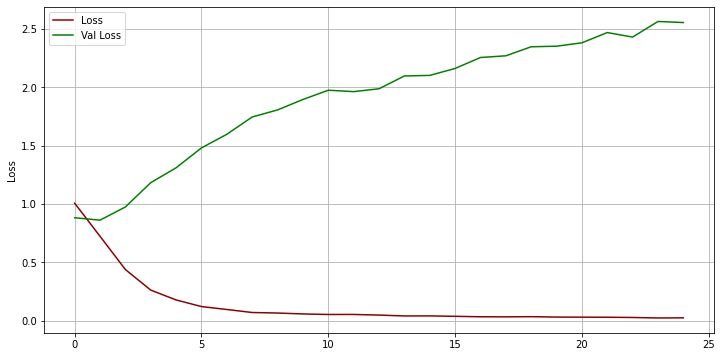

In [62]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

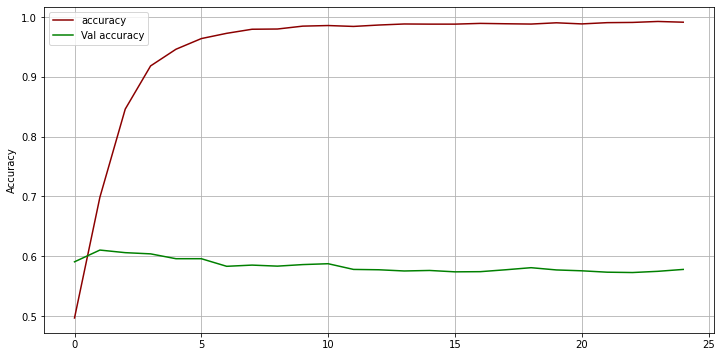

In [63]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [64]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

109/109 [==============================] - 0s 2ms/step - loss: 2.5528 - accuracy: 0.5780


In [27]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['text'])))

vocab = set_array(df_all['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [20]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    #tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    #tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [17]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [23]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=20, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/20
64/64 [==============================] - 5s 73ms/step - loss: 1.0650 - accuracy: 0.4550 - val_loss: 1.0215 - val_accuracy: 0.4376
Epoch 2/20
64/64 [==============================] - 3s 47ms/step - loss: 0.8622 - accuracy: 0.5876 - val_loss: 0.9027 - val_accuracy: 0.5795
Epoch 3/20
64/64 [==============================] - 3s 47ms/step - loss: 0.6202 - accuracy: 0.7459 - val_loss: 1.0122 - val_accuracy: 0.5948
Epoch 4/20
64/64 [==============================] - 3s 44ms/step - loss: 0.4216 - accuracy: 0.8535 - val_loss: 1.1188 - val_accuracy: 0.5931
Epoch 5/20
64/64 [==============================] - 3s 47ms/step - loss: 0.3130 - accuracy: 0.8972 - val_loss: 1.2687 - val_accuracy: 0.5867
Epoch 6/20
64/64 [==============================] - 3s 44ms/step - loss: 0.2268 - accuracy: 0.9282 - val_loss: 1.4072 - val_accuracy: 0.5838
Epoch 7/20
64/64 [==============================] - 3s 44ms/step - loss: 0.1820 - accuracy: 0.9423 - val_loss: 1.4957 - val_accuracy: 0.5884
Epoch 8/20
64

In [28]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    #tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    #tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train, y_train_one, epochs=5, validation_data=(X_test, y_teste_one))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
325/325 [==============================] - 10s 32ms/step - loss: 0.9638 - accuracy: 0.5297 - val_loss: 0.8146 - val_accuracy: 0.6421
Epoch 2/5
325/325 [==============================] - 9s 29ms/step - loss: 0.6791 - accuracy: 0.7199 - val_loss: 0.8346 - val_accuracy: 0.6057
Epoch 3/5
325/325 [==============================] - 9s 28ms/step - loss: 0.4275 - accuracy: 0.8459 - val_loss: 1.0143 - val_accuracy: 0.6023
Epoch 4/5
325/325 [==============================] - 9s 28ms/step - loss: 0.2858 - accuracy: 0.9002 - val_loss: 1.2257 - val_accuracy: 0.5893
Epoch 5/5
325/325 [==============================] - 9s 28ms/step - loss: 0.2059 - accuracy: 0.9298 - val_loss: 1.3995 - val_accuracy: 0.5867
 
Iter:  2
 
Epoch 1/5
325/325 [==============================] - 10s 31ms/step - loss: 0.9658 - accuracy: 0.5281 - val_loss: 0.8500 - val_accuracy: 0.6300
Epoch 2/5
325/325 [==============================] - 9s 28ms/step - loss: 0.6789 - accuracy: 0.7233 - val_loss: 0.8954 - v

In [29]:
media_std(val_accuracy)

 Fold: 0	Média: 0.6051993012428284	Std: 0.01984837781383895 
 Fold: 1	Média: 0.6045060634613038	Std: 0.015487758320266371 
 Fold: 2	Média: 0.6168110847473145	Std: 0.008860884261347124 
 Fold: 3	Média: 0.6052038192749023	Std: 0.008662611852822667 
 Fold: 4	Média: 0.5802255034446716	Std: 0.014219526475086645 
 Fold: 5	Média: 0.5887250661849975	Std: 0.027554563042926337 
 Fold: 6	Média: 0.61405029296875	Std: 0.011492988998364786 
 Fold: 7	Média: 0.629661750793457	Std: 0.014739050729768919 
 Fold: 8	Média: 0.5946227192878724	Std: 0.00814710702547966 
 Fold: 9	Média: 0.5935819625854493	Std: 0.00840164911579875 


In [31]:
np.array([0.6051993012428284,
0.6045060634613038,
0.6168110847473145,
0.6052038192749023, 
0.5802255034446716,
0.5887250661849975, 
0.61405029296875, 
0.629661750793457,  
0.5946227192878724, 
0.5935819625854493]).mean() 

0.6032587563991546

In [30]:
np.array([ 0.01984837781383895, 
0.015487758320266371,
0.008860884261347124, 
0.008662611852822667,     
0.014219526475086645,     
0.027554563042926337,     
0.011492988998364786,    
0.014739050729768919,
0.00814710702547966, 
0.00840164911579875]).mean()

0.01374145176357002

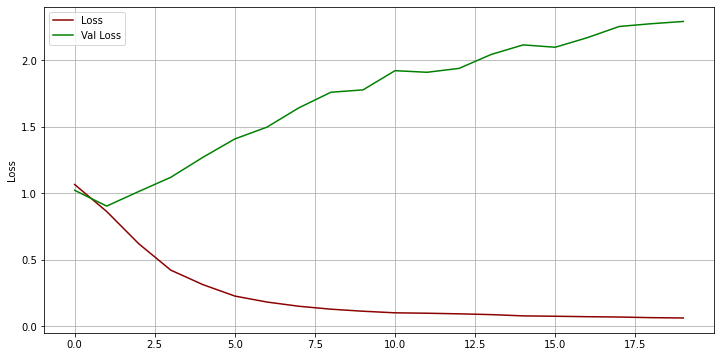

In [24]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

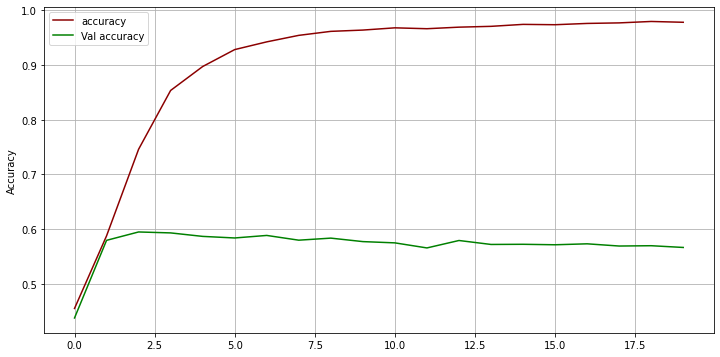

In [25]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [26]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

109/109 [==============================] - 1s 6ms/step - loss: 2.2898 - accuracy: 0.5665


## Conv 1D

In [27]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(32,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [32]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(32,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=10, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/10
82/82 [==============================] - 1s 17ms/step - loss: 1.0429 - accuracy: 0.4731 - val_loss: 0.9437 - val_accuracy: 0.5693
Epoch 2/10
82/82 [==============================] - 1s 15ms/step - loss: 0.8111 - accuracy: 0.6340 - val_loss: 0.8279 - val_accuracy: 0.6153
Epoch 3/10
82/82 [==============================] - 1s 16ms/step - loss: 0.5228 - accuracy: 0.8057 - val_loss: 0.9246 - val_accuracy: 0.6049
Epoch 4/10
82/82 [==============================] - 1s 15ms/step - loss: 0.3044 - accuracy: 0.9045 - val_loss: 1.1602 - val_accuracy: 0.5693
Epoch 5/10
82/82 [==============================] - 1s 16ms/step - loss: 0.1772 - accuracy: 0.9453 - val_loss: 1.2773 - val_accuracy: 0.5927
Epoch 6/10
82/82 [==============================] - 1s 17ms/step - loss: 0.1103 - accuracy: 0.9669 - val_loss: 1.4372 - val_accuracy: 0.5849
Epoch 7/10
82/82 [==============================] - 1s 17ms/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 1.5954 - val_accuracy: 0.5884
Ep

In [33]:
media_std(val_accuracy)

 Fold: 0	Média: 0.5834488689899444	Std: 0.016146945851560793 
 Fold: 1	Média: 0.5908145546913147	Std: 0.00876716574162212 
 Fold: 2	Média: 0.6008665502071381	Std: 0.02695294981599688 
 Fold: 3	Média: 0.605810922384262	Std: 0.021783803151781467 
 Fold: 4	Média: 0.5684301823377609	Std: 0.03092806384384266 
 Fold: 5	Média: 0.5665221154689789	Std: 0.0427498373152352 
 Fold: 6	Média: 0.5758889853954315	Std: 0.03352997264764776 
 Fold: 7	Média: 0.6000867247581482	Std: 0.019530482139150943 
 Fold: 8	Média: 0.5634865552186966	Std: 0.04927325212365023 
 Fold: 9	Média: 0.5748482286930084	Std: 0.028599426676601675 


In [35]:
np.array([0.5834488689899444, 
0.5908145546913147,
0.6008665502071381, 
0.605810922384262,
0.5684301823377609, 
0.5665221154689789,  
0.5758889853954315,
0.6000867247581482,  
0.5634865552186966, 
0.5748482286930084]).mean() 

0.5830203688144685

In [34]:
np.array([0.016146945851560793,
0.00876716574162212,
0.02695294981599688,
0.021783803151781467,
0.03092806384384266,
0.0427498373152352,
0.03352997264764776,
0.019530482139150943,
0.04927325212365023,
0.028599426676601675]).mean()

0.027826189930708976

In [26]:
best_ = []
for i in range(len(val_accuracy)):
    best_acc = 0
    for j in range(5):
        if val_accuracy[i][j] > best_acc:
            best_acc = val_accuracy[i][j]
    best_.append(best_acc)

best_

[0.6317157745361328,
 0.6065858006477356,
 0.6135181784629822,
 0.6348655819892883,
 0.5862966179847717,
 0.6097137928009033,
 0.6001734733581543,
 0.6287944316864014,
 0.5967042446136475,
 0.6045099496841431]

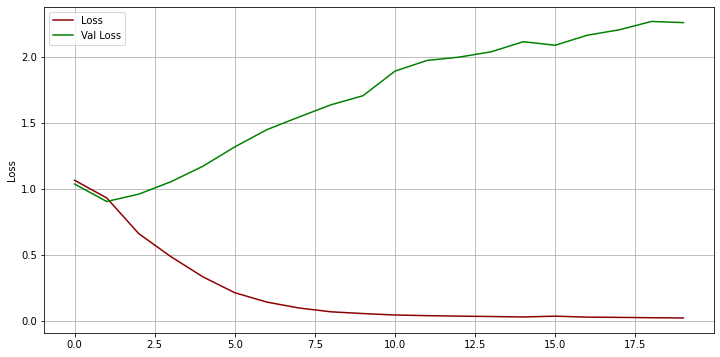

In [29]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

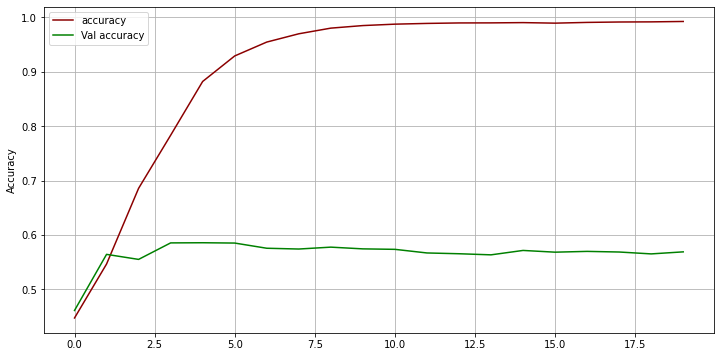

In [30]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## BDR

In [75]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=1,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1)),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.1)
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [76]:
X_train.shape

(10379,)

In [77]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=30 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/10
346/346 [==============================] - 5s 16ms/step - loss: 1.0744 - accuracy: 0.4497 - val_loss: 1.0510 - val_accuracy: 0.4627
Epoch 2/10
346/346 [==============================] - 4s 11ms/step - loss: 1.0211 - accuracy: 0.4654 - val_loss: 0.9852 - val_accuracy: 0.5095
Epoch 3/10
346/346 [==============================] - 4s 11ms/step - loss: 0.8910 - accuracy: 0.5662 - val_loss: 0.9270 - val_accuracy: 0.5061
Epoch 4/10
346/346 [==============================] - 4s 11ms/step - loss: 0.7661 - accuracy: 0.6216 - val_loss: 0.9226 - val_accuracy: 0.5286
Epoch 5/10
346/346 [==============================] - 4s 11ms/step - loss: 0.6752 - accuracy: 0.6647 - val_loss: 0.9425 - val_accuracy: 0.5615
Epoch 6/10
346/346 [==============================] - 4s 11ms/step - loss: 0.6160 - accuracy: 0.7018 - val_loss: 0.9726 - val_accuracy: 0.5702
Epoch 7/10
346/346 [==============================] - 4s 11ms/step - loss: 0.5744 - accuracy: 0.7120 - val_loss: 1.0143 - val_accuracy: 0.5754

In [36]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=1,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1)),

    tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=10, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/10
82/82 [==============================] - 3s 33ms/step - loss: 1.0884 - accuracy: 0.4424 - val_loss: 1.0724 - val_accuracy: 0.4723
Epoch 2/10
82/82 [==============================] - 1s 13ms/step - loss: 1.0675 - accuracy: 0.4501 - val_loss: 1.0474 - val_accuracy: 0.4723
Epoch 3/10
82/82 [==============================] - 1s 13ms/step - loss: 1.0433 - accuracy: 0.4567 - val_loss: 1.0194 - val_accuracy: 0.4905
Epoch 4/10
82/82 [==============================] - 1s 13ms/step - loss: 1.0009 - accuracy: 0.5231 - val_loss: 0.9740 - val_accuracy: 0.5607
Epoch 5/10
82/82 [==============================] - 1s 12ms/step - loss: 0.9342 - accuracy: 0.5847 - val_loss: 0.9209 - val_accuracy: 0.5927
Epoch 6/10
82/82 [==============================] - 1s 12ms/step - loss: 0.8581 - accuracy: 0.6266 - val_loss: 0.8823 - val_accuracy: 0.6057
Epoch 7/10
82/82 [==============================] - 1s 12ms/step - loss: 0.7837 - accuracy: 0.6598 - val_loss: 0.8591 - val_accuracy: 0.6014
Ep

In [37]:
media_std(val_accuracy)

 Fold: 0	Média: 0.564124783873558	Std: 0.05852653066105758 
 Fold: 1	Média: 0.5882148981094361	Std: 0.046166607803603196 
 Fold: 2	Média: 0.536308491230011	Std: 0.05663883999433459 
 Fold: 3	Média: 0.5140503108501434	Std: 0.029961637274748435 
 Fold: 4	Média: 0.4861231505870819	Std: 0.04571968439869184 
 Fold: 5	Média: 0.45767562687397	Std: 0.04889010620322023 
 Fold: 6	Média: 0.5346053808927536	Std: 0.04687479746883418 
 Fold: 7	Média: 0.5882914185523986	Std: 0.03965774547725595 
 Fold: 8	Média: 0.5186470061540603	Std: 0.06771295847454711 
 Fold: 9	Média: 0.5251517742872238	Std: 0.04822896844178523 


In [39]:
np.array([0.564124783873558, 
0.5882148981094361,
0.536308491230011,
0.5140503108501434,  
0.4861231505870819,
0.45767562687397, 
0.5346053808927536,  
0.5882914185523986,  
0.5186470061540603, 
0.5251517742872238]).mean()  

0.5313192841410637

In [38]:
np.array([0.05852653066105758,
0.046166607803603196,
0.05663883999433459,
0.029961637274748435,
0.04571968439869184,
0.04889010620322023,
0.04687479746883418,
0.03965774547725595,
0.06771295847454711,
0.04822896844178523]).mean()

0.04883778761980784

In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, 35)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 35, 1)             15000     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 2)                 24        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 9         
Total params: 15,033
Trainable params: 15,033
Non-trainable params: 0
_________________________________________________________________


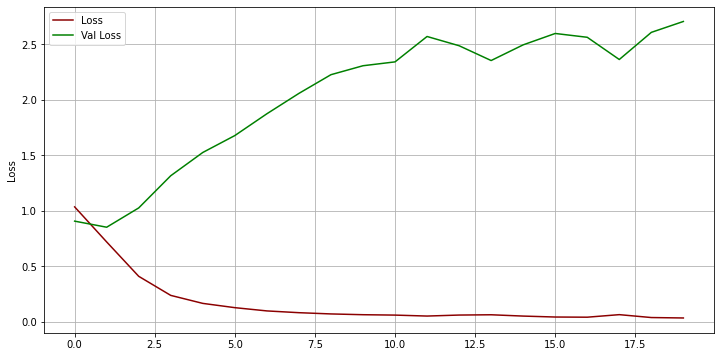

In [33]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

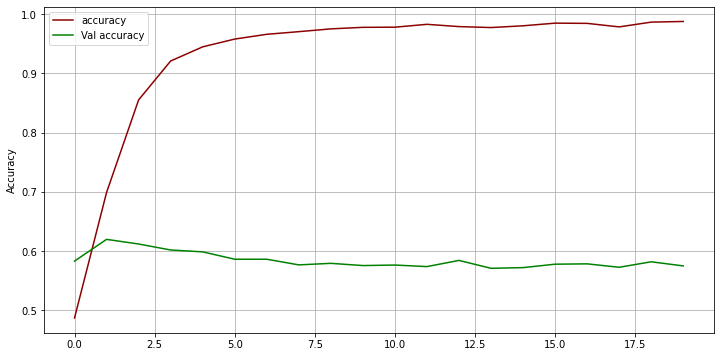

In [34]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [18]:
TextClassifier = ak.TextClassifier(
    num_classes=3, 
    multi_label=True, 
    loss=tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy'],
    project_name="text_classifier",
    max_trials=1,
    objective="val_loss"
)

fit = TextClassifier.fit(
    x=np.asarray(pre_X(X_train)), y=one.fit_transform(Y_train.reshape(-1,1)), epochs=10, validation_split=0.2, validation_data=(np.asarray(pre_X(X_test)),one.fit_transform(Y_test.reshape(-1,1)) )
)


INFO:tensorflow:Reloading Oracle from existing project .\text_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\text_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
253/253 [==============================] - 23s 92ms/step - loss: 0.5958 - accuracy: 0.4936 - val_loss: 0.5222 - val_accuracy: 0.5882
Epoch 2/10
253/253 [==============================] - 24s 95ms/step - loss: 0.4689 - accuracy: 0.6444 - val_loss: 0.5052 - val_accuracy: 0.6066
Epoch 3/10
253/253 [==============================] - 27s 107ms/step - loss: 0.3611 - accuracy: 0.7537 - val_loss: 0.5646 - val_accuracy: 0.5960
Epoch 4/10
253/253 [==============================] - 24s 94ms/step - loss: 0.2627 - accuracy: 0.8339 - val_loss: 0.6647 - val_accuracy: 0.5847
Epoch 5/10
253/253 [==============================] - 24s 95ms/step - loss: 0.1892 - accuracy: 0.8875 - val_loss: 0.7942 - val_accuracy: 0.5760
Epoch 6/10
253/253 [==============================] - 23s 92ms/step - loss: 0.1409 - accu